# FFT, DFT and Applications

In [1]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt

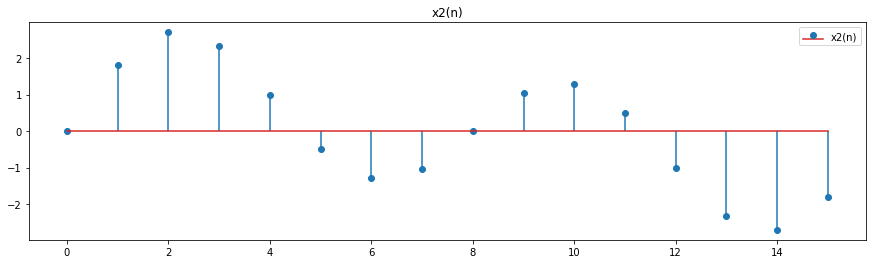

In [2]:
N = 16
n = np.linspace(0, N-1, N)
k = n

x1 = np.cos(2 * np.pi * n/N) + 2 * np.cos(4 * np.pi * n / N)
#x1 = np.array((1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0))
x1 = x1.reshape(1, N)

x2 = np.sin(2 * np.pi * n/N) + 2 * np.sin(4 * np.pi * n / N)
x2 = x2.reshape(1, N)
plt.figure().set_figwidth(15)
plt.title('x2(n)')
#plt.stem(n, x1[0], label = 'x1(n)')
plt.stem(n, x2[0], label = 'x2(n)')
plt.legend()
plt.show()

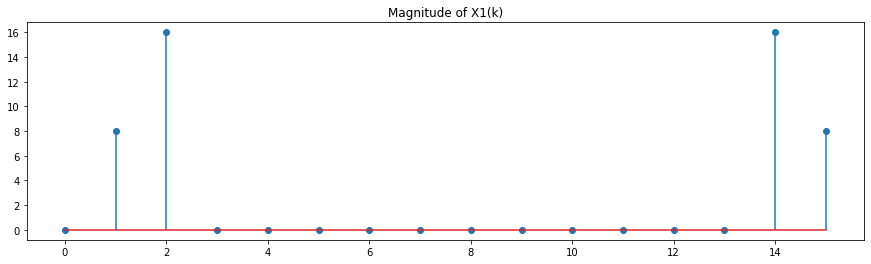

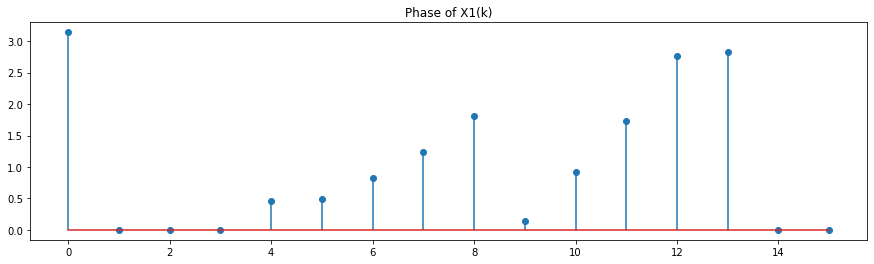

In [3]:
w = np.e **(complex(0,1) * 2 * np.pi / N)
#print(w)

T = np.ones(N).reshape(1, 16)

for i in range(1, N):
    T = np.vstack((T, w**-(i * k)))

R = np.conjugate(T)


X1 = x1.dot(T)

#print(x1)

#print(X1.shape)
#print(X1)
#print(np.angle(X1[0]))
plt.figure().set_figwidth(15)
plt.title('Magnitude of X1(k)')
plt.stem(k, np.abs(X1[0]))
plt.show()

plt.figure().set_figwidth(15)
plt.title('Phase of X1(k)')
plt.stem(k, np.angle(X1[0]))
plt.show()

[[3.         2.33809309 0.70710678 1.03153013 2.         1.79689699
  0.70710678 0.49033403 1.         0.49033403 0.70710678 1.79689699
  2.         1.03153013 0.70710678 2.33809309]]


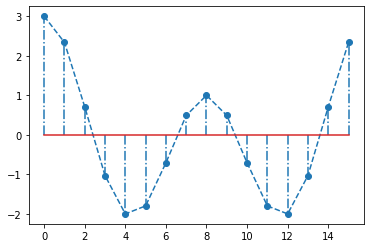

In [4]:
newXn1 = X1.dot(R) / N
print(np.abs(newXn1))


plt.plot(n, np.real(newXn1[0]), '--')
plt.stem(n, x1.T, '-.')
plt.show()

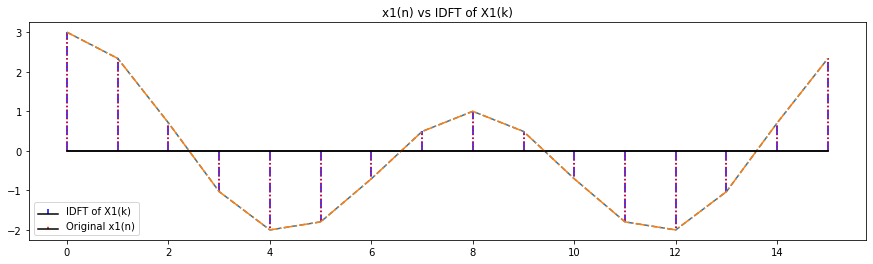

In [5]:
#print(f'Original signal:\n\nx1=\n\t{x1[0]}\n')
#print(f'IDFT:\n\n|xIDFT|=\n\t{np.abs(newXn1[0])}\n')
#print(f'< xIDFT=\n\t{np.angle(newXn1[0])}')

plt.figure().set_figwidth(15)
plt.title('x1(n) vs IDFT of X1(k)')
plt.stem(n, np.real(newXn1[0]), '-.b', '--', 'black' , label = 'IDFT of X1(k)')
plt.stem(n, x1[0], ':r', '-.', 'black', label = 'Original x1(n)' )
plt.legend()
plt.show()

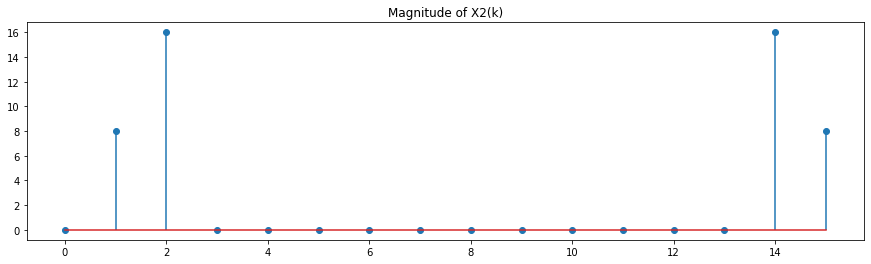

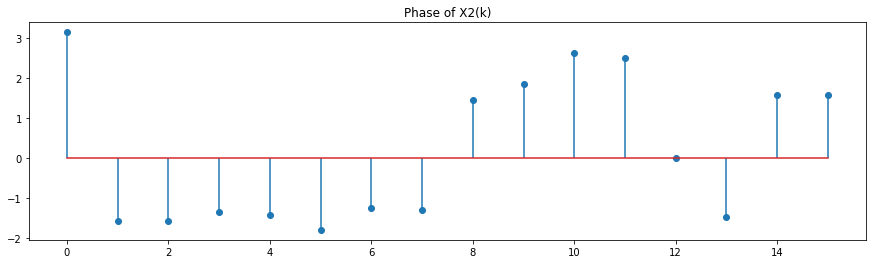

x2 = [[ 0.00000000e+00  1.79689699e+00  2.70710678e+00  2.33809309e+00
   1.00000000e+00 -4.90334030e-01 -1.29289322e+00 -1.03153013e+00
  -3.67394040e-16  1.03153013e+00  1.29289322e+00  4.90334030e-01
  -1.00000000e+00 -2.33809309e+00 -2.70710678e+00 -1.79689699e+00]]
|X2(k)| = [1.77635684e-15 8.00000000e+00 1.60000000e+01 9.80270978e-15
 4.49057423e-15 5.80430076e-15 6.77599955e-15 6.43935336e-15
 1.20148365e-14 6.20883293e-15 3.97980500e-15 5.85668954e-15
 1.82090115e-14 3.45570181e-14 1.60000000e+01 8.00000000e+00]

<X2(k)) = [ 3.14159265 -1.57079633 -1.57079633 -1.34229969 -1.42190638 -1.7925773
 -1.25422707 -1.29131254  1.44106667  1.84234141  2.61552623  2.50756993
  0.01219452 -1.48071817  1.57079633  1.57079633]

newx2 = [[8.12847811e-15 1.79689699e+00 2.70710678e+00 2.33809309e+00
  1.00000000e+00 4.90334030e-01 1.29289322e+00 1.03153013e+00
  2.26963520e-15 1.03153013e+00 1.29289322e+00 4.90334030e-01
  1.00000000e+00 2.33809309e+00 2.70710678e+00 1.79689699e+00]]


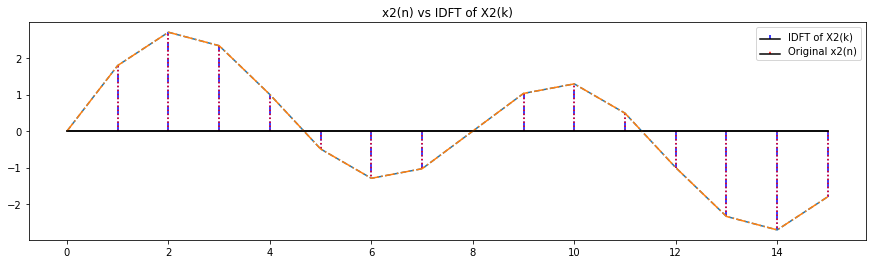

In [6]:
X2 = x2.dot(T)

plt.figure().set_figwidth(15)
plt.title('Magnitude of X2(k)')
plt.stem(n, np.abs(X2[0]), label = 'X2(k)')
plt.show()


plt.figure().set_figwidth(15)
plt.title('Phase of X2(k)')
plt.stem(n, np.angle(X2[0]), label = 'X2(k)')
plt.show()


print(f'x2 = {x2}')
print(f'|X2(k)| = {np.abs(X2[0])}\n')
print(f'<X2(k)) = {np.angle(X2[0])}\n')

newXn2 = X2.dot(R) / N
print(f'newx2 = {np.abs(newXn2)}')

plt.figure().set_figwidth(15)
plt.title('x2(n) vs IDFT of X2(k)')
plt.stem(n, np.real(newXn2[0]), '-.b', '--', 'black' , label = 'IDFT of X2(k)')
plt.stem(n, x2[0], ':r', '-.', 'black', label = 'Original x2(n)' )
plt.legend()
plt.show()

16


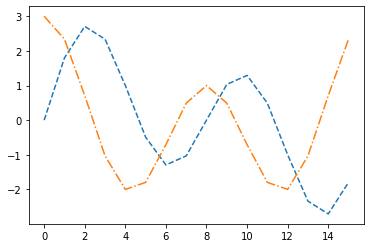

In [7]:
plt.plot(n, np.real(newXn2[0]), '--')
plt.plot(n, x1.T, '-.')
print(len(x2[0]))

## Decimation in Time FFT

With N = 16, we have 4 stages and 10 $W_N$'s to calculate

### Stage 1
when $k == 0$:
<div></div>

$ W_N^{-8k} = W_N^{-8*0} = 1$

In [8]:
x = x2

# Function to reverse the bits as shown in class
def reverse_binary(N):
    n = 4                       # for 6 digits
    value = []
    for i in range(N):
        b = bin(i)[2:]
        l = len(b)
        b = str(0) * (n - l) + b
        value.append(int(b[::-1],2))
    return(value)
      
#use the reversed bits as indexes
indexes = reverse_binary(N)


#prepare x10 to hold x(n) with the weird indexes
x10 = []
for i in range(N):
    print(f'{i}:\t{x[0][indexes[i]]}')
    x10.append(x[0][indexes[i]])
    

0:	0.0
1:	-3.6739403974420594e-16
2:	1.0000000000000002
3:	-0.9999999999999992
4:	2.7071067811865475
5:	1.2928932188134525
6:	-1.2928932188134525
7:	-2.707106781186548
8:	1.7968969947381848
9:	1.031530130008005
10:	-0.4903340298618082
11:	-2.3380930948843823
12:	2.338093094884382
13:	0.4903340298618102
14:	-1.0315301300080055
15:	-1.7968969947381872


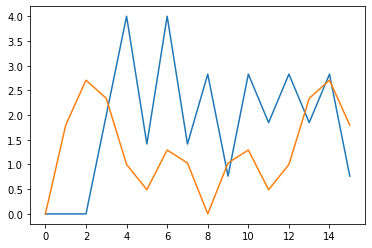

In [9]:
X20s = []

for i in range(N//2):
    X20s.append(x10[2*i] + x10[2*i + 1])
    X20s.append(x10[2*i] - x10[2*i + 1])
    
   # print(f'X20s[{2*i}] = x10[{2*i}] + x10[{2*i + 1}]')
   # print(f'X20s[{2*i + 1}] = x10[{2*i}] - x10[{2*i + 1}]')

#print()
#print(X20s)
plt.plot(n, np.abs(X20s))
plt.plot(n, np.abs(x[0]))
plt.show()

### Stage 2

k = {0, 1}, so 

<div></div>

$W_N^{-4k}$ takes the values $ 1 $ and $e^{\frac{j\pi}{2}} = -j$


[6.318066824184349e-16, (3.6739403974420594e-16-1.9999999999999996j), -1.3665947619068467e-15, (3.6739403974420594e-16+1.9999999999999996j), 0.0, (1.414213562373095-1.4142135623730954j), 8.0, (1.414213562373095+1.4142135623730954j), -8.881784197001252e-16, (0.7653668647301797-1.8477590650225741j), 5.656854249492381, (0.7653668647301797+1.8477590650225741j), -4.440892098500626e-16, (1.8477590650225717-0.7653668647301817j), 5.656854249492385, (1.8477590650225717+0.7653668647301817j)]


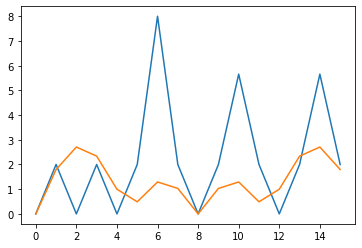

In [10]:
W_N0 = 1
W_N1 = complex(0, -1)

w = W_N0
X30s = []


for i in range(N//4):
    
    X30s.append(X20s[4*i    ] + W_N0 * X20s[4*i + 2])
    X30s.append(X20s[4*i + 1] + W_N1 * X20s[4*i + 3])
    X30s.append(X20s[4*i    ] - W_N0 * X20s[4*i + 2])
    X30s.append(X20s[4*i + 1] - W_N1 * X20s[4*i + 3])
    
print()    
print(X30s)

plt.plot(n, np.abs(X30s))
plt.plot(n, np.abs(x[0]))
plt.show()

### Stage 3

k = {0, 1, 2, 3}, so 

<div></div>

$W_N^{-2k}$ takes the values $\left\{ 1  , \left(-\frac{\sqrt{2}}{2} - j\frac{\sqrt{2}}{2}\right),  -j, \left(-\frac{\sqrt{2}}{2} + j\frac{\sqrt{2}}{2} \right) \right\}$

(0.7071067811865476-0.7071067811865475j)
[6.318066824184349e-16, (1.4534943481917463e-16-3.9999999999999996j), (-8.767360422479054e-16-8j), (8.114832495942686e-16-4.440892098500626e-16j), 6.318066824184349e-16, (5.894386446692372e-16+4.440892098500626e-16j), (-1.856453481565788e-15+8j), (-7.669517010585668e-17+3.9999999999999996j), -1.3322676295501878e-15, (1.5307337294603565-3.695518130045148j), (5.656854249492381-5.656854249492385j), (3.219646771412954e-15+4.440892098500626e-16j), -4.440892098500626e-16, (2.886579864025407e-15-6.661338147750939e-16j), (5.656854249492381+5.656854249492385j), (1.5307337294603562+3.695518130045148j)]


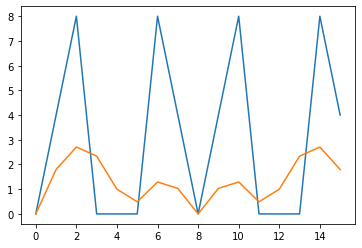

In [11]:
W_N1 = np.e ** (complex(0, -1) * np.pi /4)
W_N2 = np.e ** (complex(0, -1) * np.pi /2)
W_N3 = np.e ** (complex(0, -1) * np.pi * 3/4)

print(W_N1)
X40s = []
for i in range(N//8):
    X40s.append(X30s[8*i    ] + W_N0 *X30s[8*i + 4])
    X40s.append(X30s[8*i + 1] + W_N1 *X30s[8*i + 5])
    X40s.append(X30s[8*i + 2] + W_N2 *X30s[8*i + 6])
    X40s.append(X30s[8*i + 3] + W_N3 *X30s[8*i + 7])
    X40s.append(X30s[8*i    ] - W_N0 *X30s[8*i + 4])
    X40s.append(X30s[8*i + 1] - W_N1 *X30s[8*i + 5])
    X40s.append(X30s[8*i + 2] - W_N2 *X30s[8*i + 6])
    X40s.append(X30s[8*i + 3] - W_N3 *X30s[8*i + 7])
    
print(X40s)

plt.plot(n, np.abs(X40s))
plt.plot(n, np.abs(x[0]))
plt.show()

### Stage 4 (Final Stage)

k = {0, 1, 2, 3, 4, 5, 6, 7}, so 

<div></div>

$W_N^{-k}$ takes the values $ \left\{1, e^{-\frac{j\pi}{8}}, e^{-\frac{j\pi}{4}}, e^{-\frac{j3\pi}{8}}, -j, e^{-\frac{j5\pi}{8}}, e^{-\frac{j3\pi}{4}}, e^{-\frac{j7\pi}{8}} \right\}$

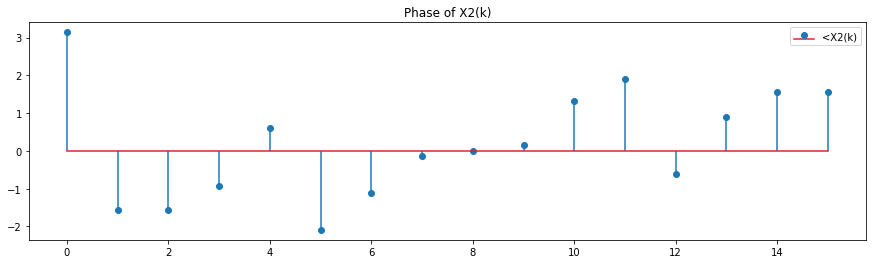

[7.00460947e-16 8.00000000e+00 1.60000000e+01 4.07131534e-15
 7.72266088e-16 2.26952582e-15 3.93688622e-15 3.06427977e-15
 1.96407431e-15 2.84476136e-15 3.66484543e-15 2.50250137e-15
 7.72266088e-16 3.67297073e-15 1.60000000e+01 8.00000000e+00]


In [12]:
W_N1 = np.e ** (complex(0, -1) * np.pi / 8)
W_N2 = np.e ** (complex(0, -1) * np.pi / 4)
W_N3 = np.e ** (complex(0, -1) * np.pi * 3 / 8)
W_N4 = complex(0, -1)
W_N5 = np.e ** (complex(0, -1) * np.pi * 5 / 8)
W_N6 = np.e ** (complex(0, -1) * np.pi * 3 / 4)
W_N7 = np.e ** (complex(0, -1) * np.pi * 7 / 8)



X = []


X.append(X40s[0] + W_N0 * X40s[8])
X.append(X40s[1] + W_N1 * X40s[9])
X.append(X40s[2] + W_N2 * X40s[10])
X.append(X40s[3] + W_N3 * X40s[11])
X.append(X40s[4] + W_N4 * X40s[12])
X.append(X40s[5] + W_N5 * X40s[13])
X.append(X40s[6] + W_N6 * X40s[14])
X.append(X40s[7] + W_N7 * X40s[15])
X.append(X40s[0] - W_N0 * X40s[8])
X.append(X40s[1] - W_N1 * X40s[9])
X.append(X40s[2] - W_N2 * X40s[10])
X.append(X40s[3] - W_N3 * X40s[11])
X.append(X40s[4] - W_N4 * X40s[12])
X.append(X40s[5] - W_N5 * X40s[13])
X.append(X40s[6] - W_N6 * X40s[14])
X.append(X40s[7] - W_N7 * X40s[15])




plt.figure().set_figwidth(15)
#plt.title('Magnitude of X2(k)')
plt.title('Phase of X2(k)')
#plt.stem(n, np.abs(X), label='|X2(k)|')
plt.stem(n, np.angle(X), label='<X2(k)')

plt.legend()
plt.show()

print(np.abs(X))

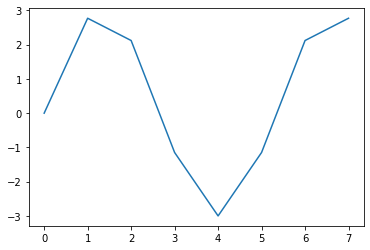

In [13]:
N = 8
n = np.linspace(0, N-1, N)
k = n
x = 3 * np.sin(6*np.pi*n/16)
x = x.reshape((1, N))
plt.plot(n, x[0])
plt.show()

In [14]:
w = np.e **(complex(0,1) * 2 * np.pi / N)
#print(w)

T = np.ones(N).reshape(1, 8)

for i in range(1, N):
    T = np.vstack((T, w**-(i * k)))

R = np.conjugate(T)

#print(f'|X2(k)| = {np.abs(X1)}\n')
#print(f'<X2(k)) = {np.angle(X1)}\n')
#print('T:')
#print(T)
#print('\nR:')
#print(R)
X = x.dot(T)

X_c = np.conjugate(X)

E = x.dot(x.T)
E = (1/N) * X.dot(X_c.T)
print(E)

[[36.+0.j]]


31


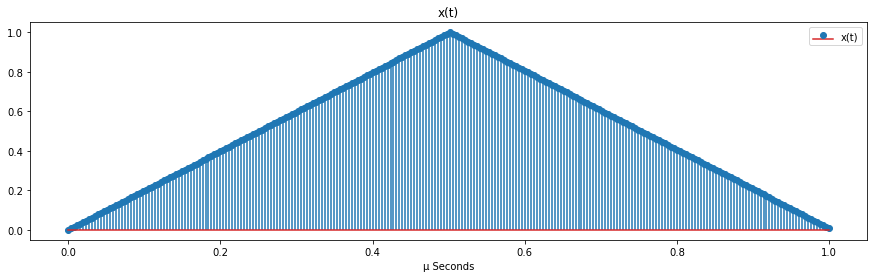

[0.        0.0078125 0.015625  0.0234375 0.03125   0.0390625 0.046875
 0.0546875 0.0625    0.0703125 0.078125  0.0859375 0.09375   0.1015625
 0.109375  0.1171875 0.125     0.1328125 0.140625  0.1484375 0.15625
 0.1640625 0.171875  0.1796875 0.1875    0.1953125 0.203125  0.2109375
 0.21875   0.2265625 0.234375  0.2421875 0.25      0.2578125 0.265625
 0.2734375 0.28125   0.2890625 0.296875  0.3046875 0.3125    0.3203125
 0.328125  0.3359375 0.34375   0.3515625 0.359375  0.3671875 0.375
 0.3828125 0.390625  0.3984375 0.40625   0.4140625 0.421875  0.4296875
 0.4375    0.4453125 0.453125  0.4609375 0.46875   0.4765625 0.484375
 0.4921875 0.5       0.5078125 0.515625  0.5234375 0.53125   0.5390625
 0.546875  0.5546875 0.5625    0.5703125 0.578125  0.5859375 0.59375
 0.6015625 0.609375  0.6171875 0.625     0.6328125 0.640625  0.6484375
 0.65625   0.6640625 0.671875  0.6796875 0.6875    0.6953125 0.703125
 0.7109375 0.71875   0.7265625 0.734375  0.7421875 0.75      0.7578125
 0.765625  0.77343

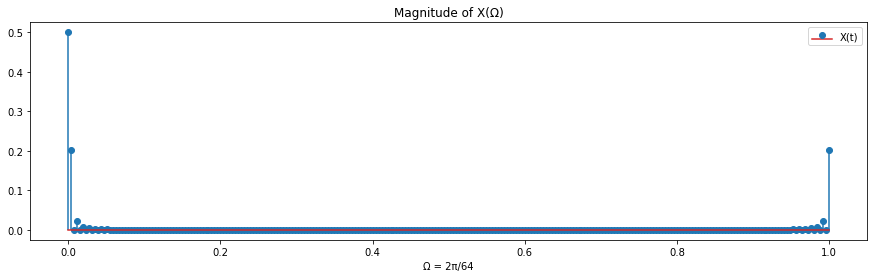

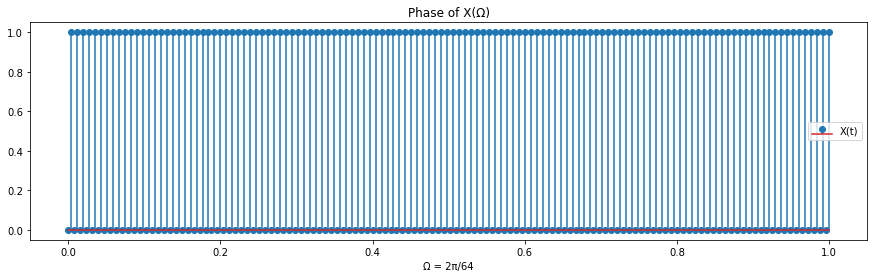

In [326]:

N = 256

Tp = 1 #μS

Ts = Tp/(N)

n = np.linspace(0, Tp, N)

y = np.empty(n.size)

for i in range(n.size//2):
    y[i] = (i * 2) * Ts

for i in range(n.size//2, n.size):
    y[i] = 1  - ((2* Ts*(i - (n.size/2))))
    
print(a)
plt.figure().set_figwidth(15)
plt.title('x(t)')
plt.stem(n, y[::], label='x(t)')
plt.xlabel('μ Seconds')
plt.legend()
plt.show()
print(y)

Y = np.fft.ifft(y)
print('Magnitude:\n')
print(np.abs(Y))
print('Phase:\n')
print(np.angle(Y))
plt.figure().set_figwidth(15)
plt.title('Magnitude of X(Ω)')
plt.stem(n, np.abs(Y), label='X(t)')
plt.xlabel('Ω = 2π/64')
plt.legend()
plt.show()

plt.figure().set_figwidth(15)
plt.title('Phase of X(Ω)')
plt.stem(n, np.angle(Y)/np.pi, label='X(t)')
plt.xlabel('Ω = 2π/64')
plt.legend()
plt.show()

Obtain Fourier Series Coefficients from DC to 10th harmonic

C1 = 0.20264236728467555e j-0.9999999999999999π
C2 = 1.9473525575262933e-19e j1.0π
C3 = 0.02251581858718617e j-0.9999999999999999π
C4 = 1.5679321600361183e-19e j0.0π
C5 = 0.008105694691387022e j-0.9999999999999997π
C6 = 3.8500379416529975e-20e j1.0π
C7 = 0.0041355585160137865e j-0.9999999999999994π
C8 = 1.8971019874508744e-20e j1.0π
C9 = 0.0025017576207984637e j-0.9999999999999991π
C10 = 2.6001589309629805e-20e j1.0π


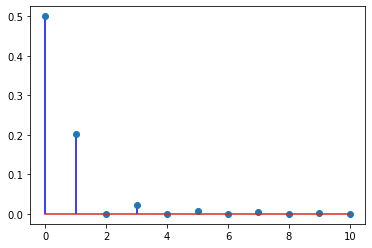

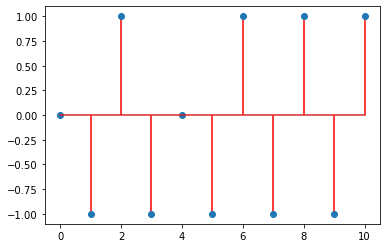

0.008105694691387022


In [282]:
n = np.linspace(0, 10, 11)

a = np.array(0.5)

T = 2*(10**-6)
for i in range(1, n.size):
    if(True):
        #print(f'{i}:\n')
        e10 = np.e**(complex(0,-1) * 2 * np.pi * i)
        #print(f'e10 = e^({complex(0, -1) * 2 * i} π) = {e10}')
        e11 = np.e ** (complex(0,1) * np.pi * i)
        #print(f'e11 = e^({complex(0, 1) * i}π) = {e11}')
        numerator = e10 * (-1 + (e11*(1 - complex(0, 1) * np.pi * i)))*T
        denominator = 2 * (np.pi **2) * (i **2)
        term1 = numerator/denominator
        e20 = np.e**(complex(0,-1)  * np.pi * i)
        #print(f'e20 = e^({complex(0, -1)  * i}π) = {e20}')
        e21 = np.e**(complex(0,1)* np.pi * i)
        #print(f'e21 = e^({complex(0, 1) * i}π) = {e21}')
        numerator = e20 * ((complex(0, -1) * np.pi * i) + e21 - 1) * T
        term2 = numerator/denominator
        a = np.append(a, (term1 - term2)/T)
    
    
        print(f'C{i} = {np.abs(a[a.size - 1])}e j{np.angle(a[a.size-1])/np.pi}π')
    


plt.stem(n,np.abs(a), 'blue')
plt.show()
plt.stem(n, np.angle(a)/np.pi,'red')
plt.show()
s = 2/(25 * (np.pi**2))
print(s)

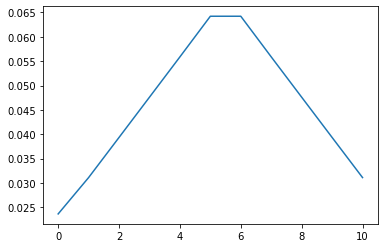

In [268]:
xx = np.fft.ifft(a)

plt.plot(n, np.real(xx))

## Part 2

$x(n) = 4*sin\left(\frac{2\pi n}{8}\right)$

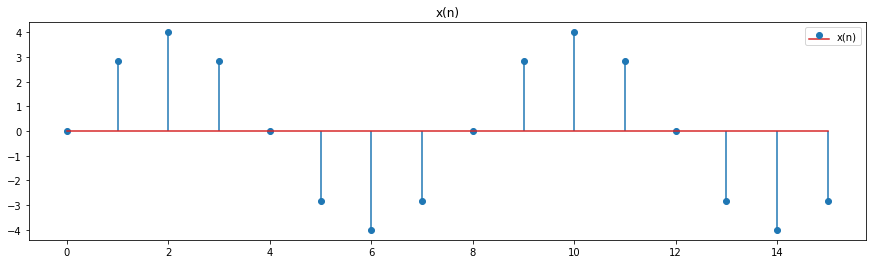

[ 0.00000000e+00  2.82842712e+00  4.00000000e+00  2.82842712e+00
  4.89858720e-16 -2.82842712e+00 -4.00000000e+00 -2.82842712e+00
 -9.79717439e-16  2.82842712e+00  4.00000000e+00  2.82842712e+00
  1.46957616e-15 -2.82842712e+00 -4.00000000e+00 -2.82842712e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [410]:
n = np.linspace(0, 15, 16)
x = 4 * np.sin((2 * np.pi * n)/8)
plt.figure().set_figwidth(15)
plt.title('x(n)')
plt.stem(n, x, label = 'x(n)')
plt.legend()
plt.show()
x = np.append(x, np.zeros(16))
print(x)

[ 0.          2.82842712  5.41421356  5.53553391  2.76776695 -1.62132034
 -5.06066017 -5.53553391 -2.76776695  1.62132034  5.06066017  5.53553391
  2.76776695 -1.62132034 -5.06066017 -5.53553391 -2.76776695 -1.20710678
 -0.35355339  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
-2.828427124746194


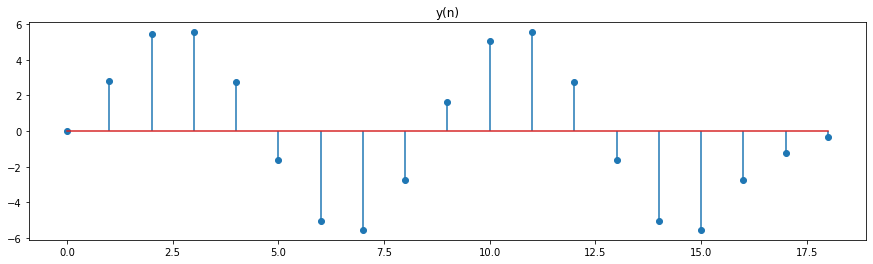

In [411]:
y = x[0]
y = np.append(y, x[1] + x[0]/2)
y = np.append(y, x[2] + x[1]/2 + x[0]/4)
for i in range(3, 32):
    y = np.append(y, x[i] + x[i-1]/2 + x[i-2]/4 + x[i-3]/8)
    
print(y)
print(x[15])

n = np.linspace(0, 18, 19)

plt.figure().set_figwidth(15)
plt.title('y(n)')
plt.stem(n, y[:19])
#plt.plot(n, x[:19])
plt.show()

[ 0.          2.82842712  5.41421356  5.53553391  2.76776695 -1.62132034
 -5.06066017 -5.53553391 -2.76776695  1.62132034  5.06066017  5.53553391
  2.76776695 -1.62132034 -5.06066017 -5.53553391 -2.76776695 -1.20710678
 -0.35355339  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


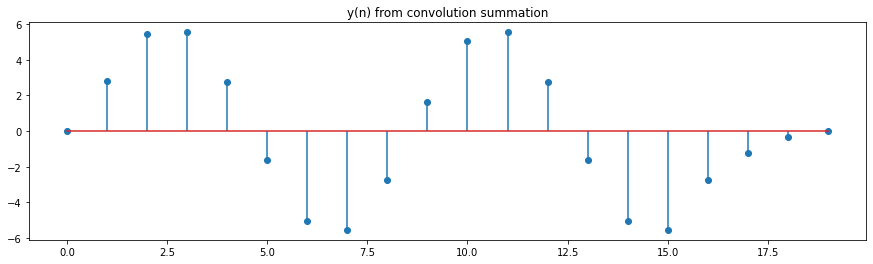

In [412]:
y = np.zeros(32)
h = y.copy()

for i in range(4):
    h[i] = 0.5 ** i


y[0] = 80
for n in range(32):
    accumulator = 0
    #print('---------------------------------')
    for k in range(n + 1):
        #print('/t++++++++++++')
        #print(f'/tx[{k}] = {x[k]}')
        #print(f'/th[{n-k}] = {h[n-k]}')
        accumulator += x[k]*h[n-k]
        #print(accumulator)

    y[n] = accumulator
    
print(y)

n = np.linspace(0, 19, 20)
plt.figure().set_figwidth(15)
plt.title('y(n) from convolution summation')
plt.stem(n, y[:n.size])
plt.show()

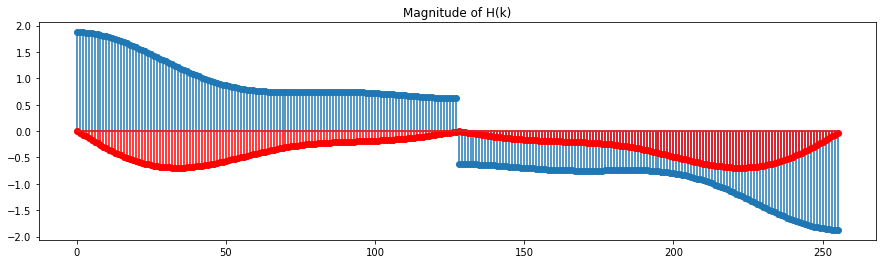

<ipython-input-505-69d8c80cff49>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[i] = X[i] * H[i]


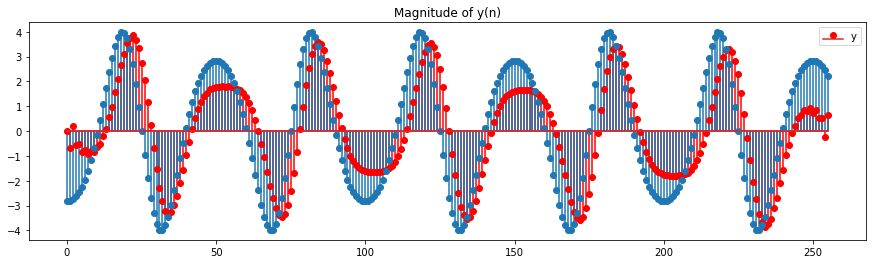

In [505]:
M = 256
N = M - 16
n = np.linspace(0, M-1, M)
y = np.zeros(16)
x = 4 * np.sin((2 * np.pi * 5 *np.cos(2*n* np.pi/100))/8)


h = np.zeros(n.size)
h[0] = 1
h[1] = 0.5
h[2] = 0.25
h[3] = 0.125

X = np.fft.fft(x)
H = np.fft.fft(h)

for i in range(H.size//2, H.size):
    H[i] = -H[i]
#plt.figure().set_figwidth(15)
#plt.title('x(n)')
#plt.stem(n, x)
#plt.show()

#plt.figure().set_figwidth(15)
#plt.title('Magnitude of X(k)')
#plt.stem(n, np.abs(X))
#plt.show()

#plt.figure().set_figwidth(15)
#plt.title('Phase of X(k)')
#plt.stem(n, np.angle(X)/np.pi)
#plt.show()

plt.figure().set_figwidth(15)
plt.title('Magnitude of H(k)')
plt.stem(n, np.real(H))
plt.stem(n, np.imag(H), 'r', markerfmt='ro', label='y')
plt.show()

#plt.figure().set_figwidth(15)
#plt.title('Phase of H(k)')
#plt.stem(n, np.angle(H))
#plt.show()

Y = np.zeros(n.size)

for i in range(n.size):
    Y[i] = X[i] * H[i]

#plt.figure().set_figwidth(15)
#plt.title('Magnitude of Y(k)')
#plt.stem(n, np.abs(Y))
#plt.show()

#plt.figure().set_figwidth(15)
#plt.title('Phase of Y(k)')
#plt.stem(n, np.angle(Y))
#plt.show()

y = np.fft.ifft(Y)

plt.figure().set_figwidth(15)
plt.title('Magnitude of y(n)')
plt.stem(n, np.imag(y), 'r', markerfmt='ro', label='y')
plt.stem(n, x)
plt.legend()
plt.show()

#plt.figure().set_figwidth(15)
#plt.title('Phase of y(n)')
#plt.stem(n, np.angle(y))
#plt.show()

32


/Users/katutu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

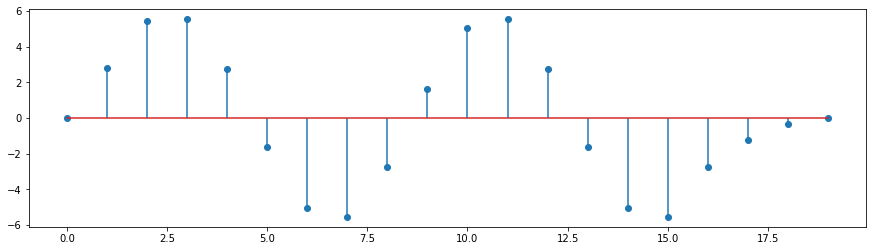

In [469]:


x1 = np.append(x[0:13], np.zeros(3))
x2 = np.append(x[13:], np.zeros(13))


X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)

y1 = np.fft.ifft(X1 * H)
y2 = np.fft.ifft(X2 * H)

y = np.copy(y1)

y[13] += y2[0]
y[14] += y2[1]
y[15] += y2[2]


y = np.append(y, y2[3:])
y = np.append(y, np.zeros(3))

print(y.size)

n = np.linspace(0, 19, 20)
   
plt.figure().set_figwidth(15)    
plt.stem(n, y[:20])

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190.]


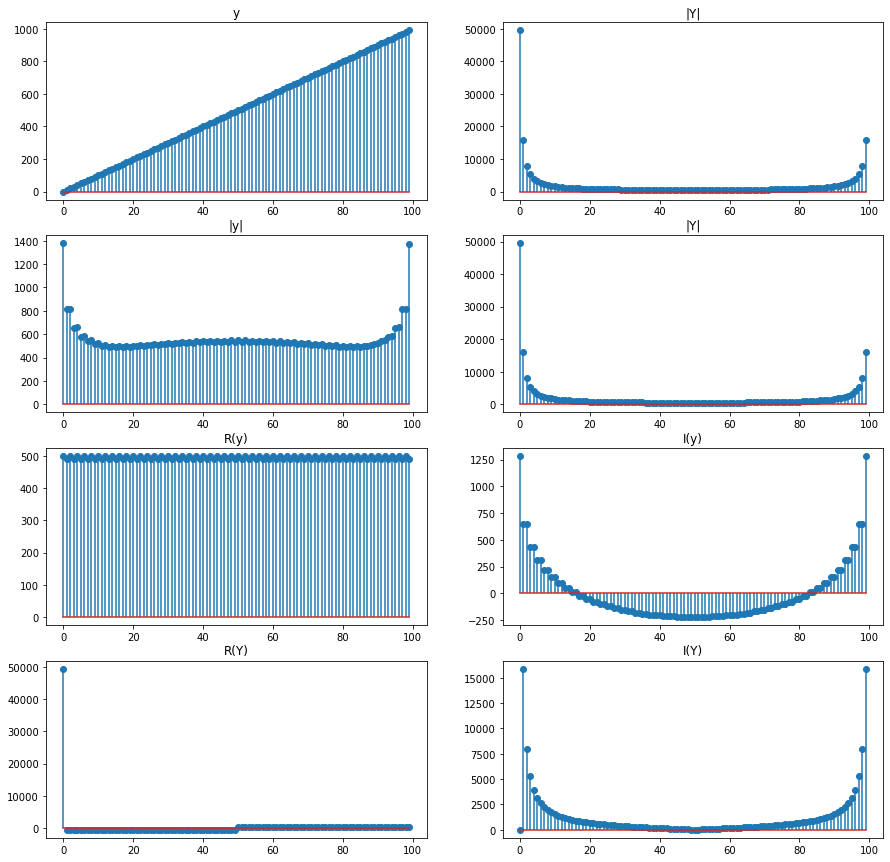

In [548]:

n = np.linspace(0, 99, 100)

y = np.copy(n) * 10
#y = np.e**( 2* np.pi *n/100)

print(y[:20])
fig, ax = plt.subplots(4, 2)
fig.set_figwidth(15)
fig.set_figheight(15)
ax[0,0].stem(n, y)
ax[0,0].title.set_text('y')

Y = np.fft.fft(y)

ax[0,1].stem(n, np.abs(Y))
ax[0,1].title.set_text('|Y|')
for i in range(n.size//2, n.size):
    Y[i] = -Y[i]

#print(Y[:5])
#for i in range(n.size//2):
#    Y[i] = 2 * Y[i]

#for i in range(n.size//2, n.size):
#    Y[i] = Y[i] / 2
    
y = np.fft.ifft(Y)



ax[1,0].stem(n, np.abs(y))
ax[1,0].title.set_text('|y|')

ax[1,1].stem(n, np.abs(Y))
ax[1,1].title.set_text('|Y|')

ax[2,0].stem(n, np.real(y))
ax[2,0].title.set_text('R(y)')

ax[2,1].stem(n, np.imag(y))
ax[2,1].title.set_text('I(y)')

ax[3,0].stem(n, np.real(Y))
ax[3,0].title.set_text('R(Y)')

ax[3,1].stem(n, np.imag(Y))
ax[3,1].title.set_text('I(Y)')


plt.show()